In [1]:
import matplotlib.pyplot as plt

from outbreak_data.authenticate_user import set_authentication
from outbreak_data import outbreak_data
import auth_token

set_authentication(auth_token.get_auth_token())

In [2]:
state = "Ohio"
samples = outbreak_data.get_wastewater_samples(region=state, date_range=["2023-09-01", "2024-01-01"])
samples = outbreak_data.get_wastewater_lineages(samples)
samples = outbreak_data.normalize_ww_loads_by_site(samples)

https://dev.outbreak.info/wastewater_metadata/query?fetch_all=true&q=geo_loc_region:Ohio AND collection_date:[2023-09-01 TO 2024-01-01] AND demix_success:true
https://dev.outbreak.info/wastewater_metadata/query?scroll_id=FGluY2x1ZGVfY29udGV4dF91dWlkDXF1ZXJ5QW5kRmV0Y2gBFnNKbEd4cUZSVEEtOXdfRy1JVV8tMmcAAAAAAAzA4xZHV0dfbkk2elNUS2dCdTI1dzA4T3F3&fetch_all=True&page=0
https://dev.outbreak.info/wastewater_metadata/query?scroll_id=FGluY2x1ZGVfY29udGV4dF91dWlkDXF1ZXJ5QW5kRmV0Y2gBFnNKbEd4cUZSVEEtOXdfRy1JVV8tMmcAAAAAAAzA4xZHV0dfbkk2elNUS2dCdTI1dzA4T3F3&fetch_all=True&page=1


In [3]:
tree, lineage_key = outbreak_data.get_tree()
abundance_data = outbreak_data.datebin_and_agg_ww(samples, freq='7D')

/home/emory/code/python-outbreak-info/outrbeakpy_venv/lib/python3.11/site-packages/outbreak_data/outbreak_data.py:852: RuntimeWarning: invalid value encountered in scalar divide
  agg_abundance = lambda lin: lambda x: (x['abundance'] * (x['name'] == lin) * x['weight']).sum() / (x['abundance'] * x['weight']).sum()


In [4]:
clustered_abundances, root_lineages, isnatural = outbreak_data.cluster_lineages((tree, lineage_key), abundance_data)

Text(0.5, 1.0, 'Ohio wastewater (weekly; clustered lineages)')

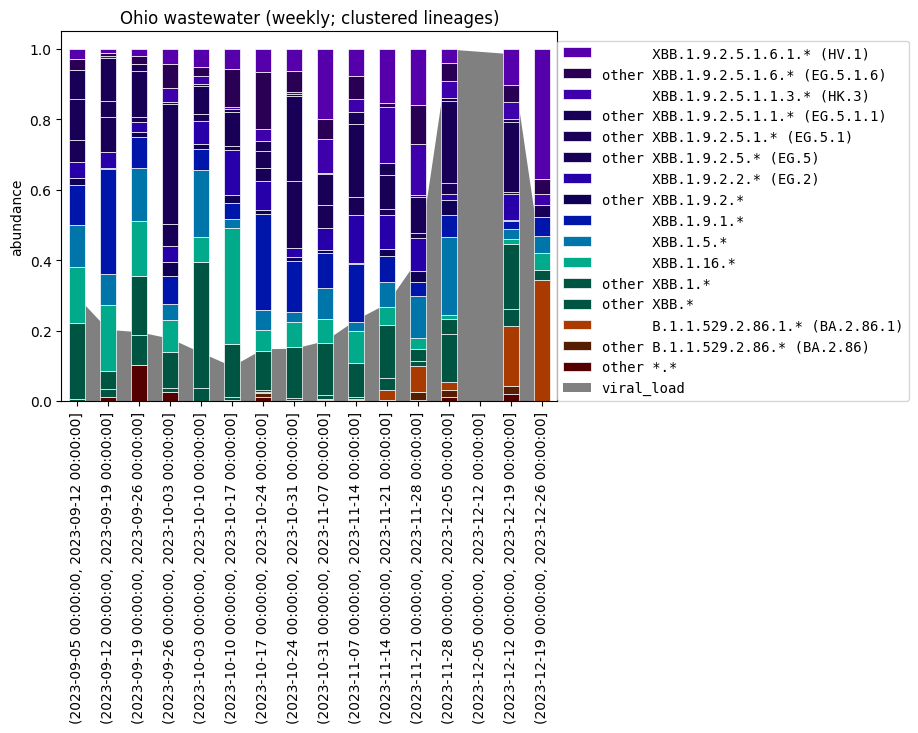

In [5]:
clustered_abundances['viral_load'].interpolate().plot(kind='area', color='gray', linewidth=0)
colors = outbreak_data.get_colors(root_lineages, isnatural, lineage_key)
clustered_abundances.drop(columns=['viral_load']).plot(
    kind = 'bar', stacked = True, edgecolor = 'w', linewidth = .5, color = colors, ax=plt.gca() )
plt.ylabel('abundance')
plt.legend(loc=(1,0), prop={"family":"monospace"}, reverse=True)
plt.title(f'{state} wastewater (weekly; clustered lineages)')

Text(0.5, 1.0, 'Ohio wastewater (weekly; clustered lineages)')

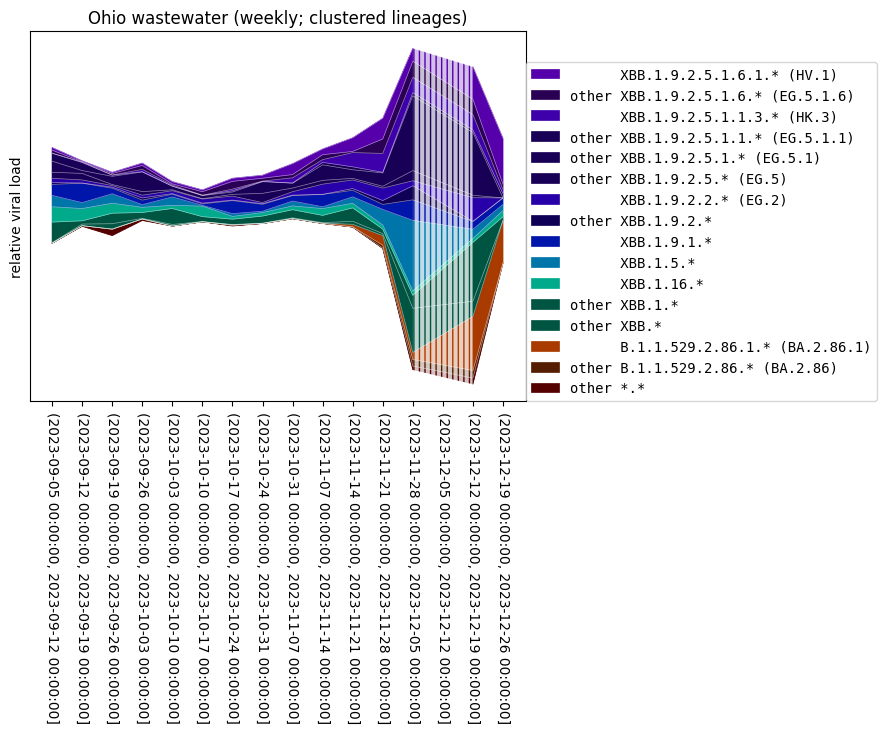

In [6]:
last_line = outbreak_data.get_riverplot_baseline(clustered_abundances)
for lin, color in zip(clustered_abundances.drop(columns=['viral_load']).columns, colors):
    next_line = last_line + clustered_abundances[lin] * clustered_abundances['viral_load'].interpolate()
    plt.fill_between( clustered_abundances[lin].index.astype(str), last_line.interpolate(), next_line.interpolate(),
                      color=list(color)+[0.25], edgecolor=color, linewidth=0, hatch='|||' )
    plt.plot(clustered_abundances[lin].index.astype(str), next_line.interpolate(), color='white', linewidth=0.5, alpha=0.5)
    plt.fill_between( clustered_abundances[lin].index.astype(str), last_line, next_line,
                      color=list(color), edgecolor=color, linewidth=0.5, label=lin )
    last_line = next_line
plt.legend(loc=(1,0), prop={"family":"monospace"}, reverse=True)
plt.xticks(rotation=-90)
plt.ylabel('relative viral load')
plt.yticks([])
plt.title(f'{state} wastewater (weekly; clustered lineages)')